In [2]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib


HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

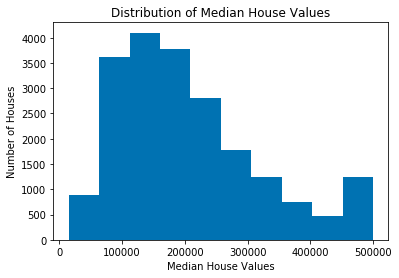

In [8]:
plt.hist(housing['median_house_value'])
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Values")
plt.ylabel("Number of Houses");

In [9]:
housing.groupby('ocean_proximity')['median_income'].mean().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     4.230682
NEAR BAY      4.172885
NEAR OCEAN    4.005785
INLAND        3.208996
ISLAND        2.744420
Name: median_income, dtype: float64

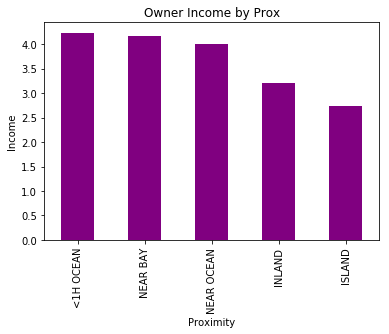

In [10]:
housing.groupby('ocean_proximity')['median_income'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                                                  color = 'purple')
plt.title("Owner Income by Prox")
plt.xlabel("Proximity")
plt.ylabel("Income");

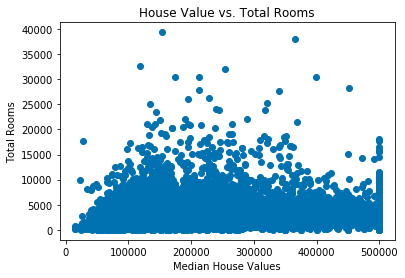

In [11]:
plt.scatter(housing['median_house_value'],housing['total_rooms']);
plt.title("House Value vs. Total Rooms")
plt.xlabel("Median House Values")
plt.ylabel("Total Rooms");

In [12]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


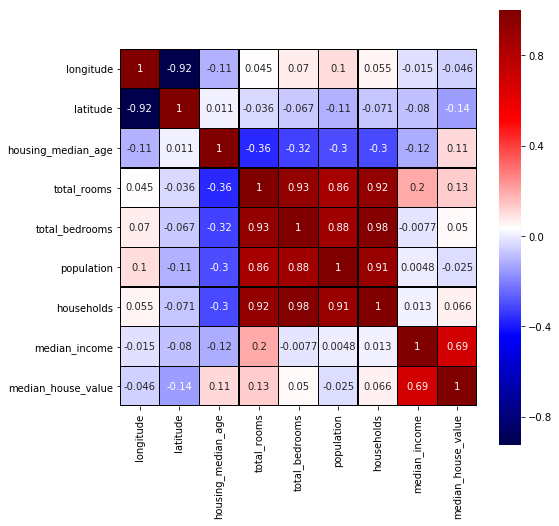

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(housing.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'seismic',
            linecolor = 'black',
            annot= True);

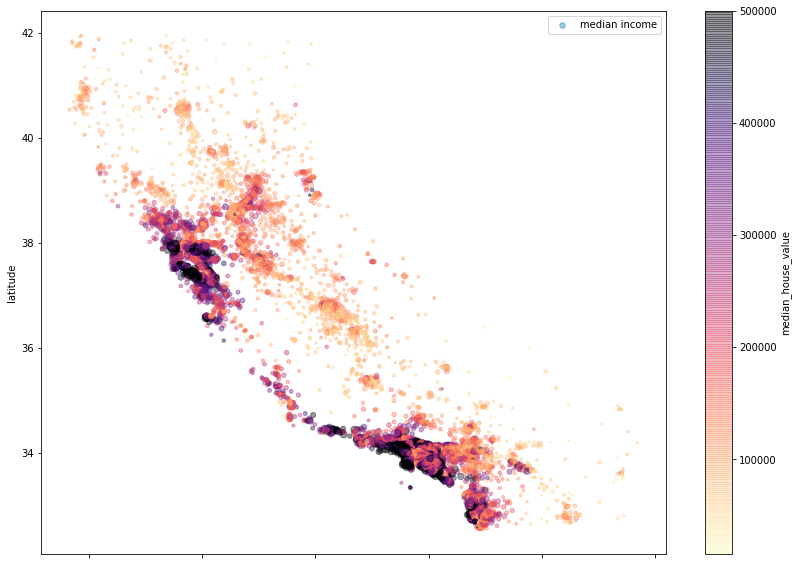

In [19]:
housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (14,10),
             alpha = 0.4,
             s = housing['median_income']*4,
             label = 'median income',
             c = 'median_house_value',
             cmap = plt.get_cmap('magma_r'),
             colorbar = True);

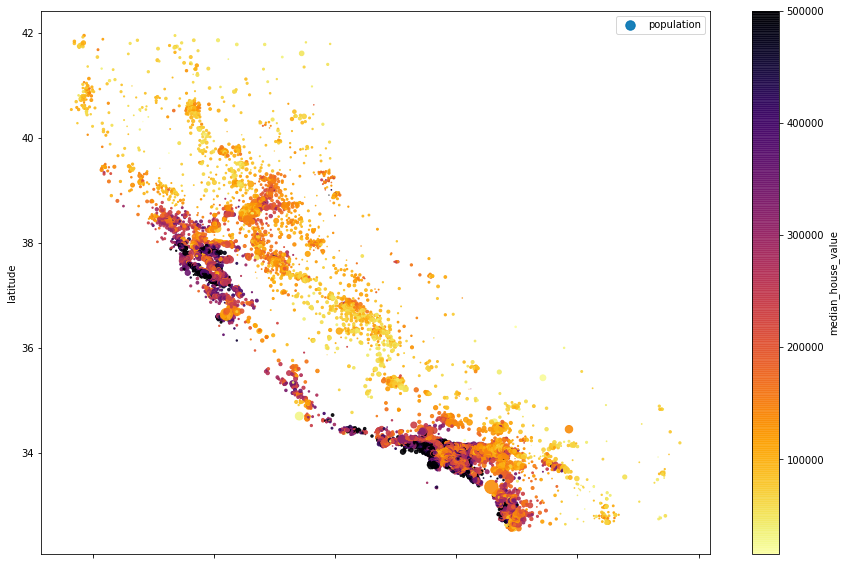

In [20]:
housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (15,10),
             alpha = 0.9,
             s = housing['population']*.005,
             label = 'population',
             c = 'median_house_value',
             cmap = plt.get_cmap('inferno_r'),
             colorbar = True);

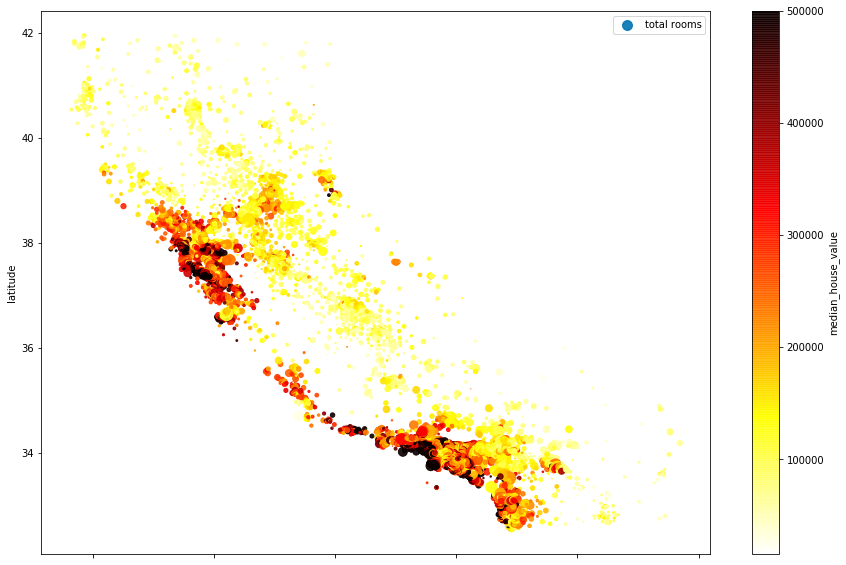

In [22]:
housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (15,10),
             alpha = 0.9,
             s = housing['total_rooms']*.005,
             label = 'total rooms',
             c = 'median_house_value',
             cmap = plt.get_cmap('hot_r'),
             colorbar = True);